In [57]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
torch.__version__

'2.5.1+cpu'

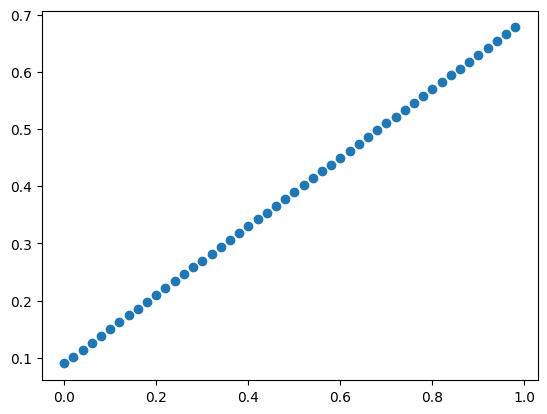

In [58]:
weight = 0.6
bias = 0.09
start =0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(1)
y = weight * X + bias
plt.scatter(X.numpy(), y.numpy())
plt.show()

In [59]:
def plot_predictions(X_train, y_train, X_test, y_test, predictions=None)->None:
    plt.scatter(
        X_train.numpy(),
        y_train.numpy(),
        c="c",
        label="train data"
    )
    plt.scatter(
        X_test.numpy(),
        y_test.numpy(),
        c="m",
        label="test data"
    )
    if predictions is not None:
        plt.plot(
            X_test.numpy(),
            predictions.numpy(),
            c="r",
            label="predictions"
        )
    plt.legend()
    plt.show()


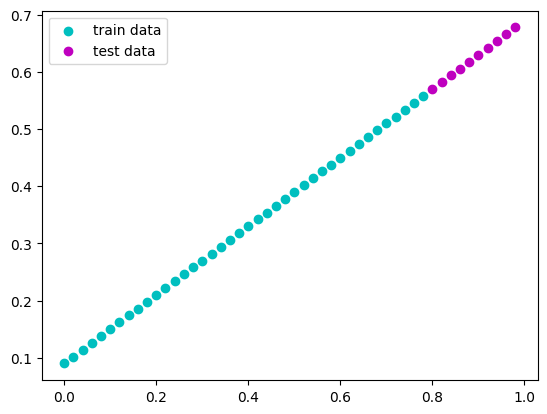

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])
tensor([[0.5700],
        [0.5820],
        [0.5940],
        [0.6060],
        [0.6180],
        [0.6300],
        [0.6420],
        [0.6540],
        [0.6660],
        [0.6780]])


In [60]:
train_data_count:int=int(len(X)*0.8)
X_train,X_test = X[:train_data_count],X[train_data_count:]
y_train,y_test = y[:train_data_count],y[train_data_count:]
plot_predictions(X_train, y_train, X_test, y_test, None)
print(X_test, y_test,sep="\n")

In [61]:
class LinearRegressionCustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.rand(1,requires_grad=True))
        self.bias=nn.Parameter(torch.rand(1,requires_grad=True))
    def forward(self, x:torch.Tensor)->torch.Tensor:
        return self.weights * x + self.bias

In [62]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(in_features=1,out_features=1)
    def forward(self, x:torch.Tensor)->torch.Tensor:
        return self.linear(x)

In [ ]:
def trainer(epochs:int,  model:nn.Module, loss_fn:nn.Module, optimizer:torch.optim.Optimizer, X_train:torch.Tensor, y_train:torch.Tensor)->None:
    model.train(True)
    for epoch in range(epochs):
        predictions = model(X_train)
        loss = loss_fn(predictions, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 5 == 0:
            print(f"Epoch: {epoch} | Loss: {loss.item()}")

In [64]:
model_0 = LinearRegressionCustomModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.8100], requires_grad=True),
 Parameter containing:
 tensor([0.1772], requires_grad=True)]

In [65]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8100])), ('bias', tensor([0.1772]))])

In [ ]:
learning_rate = 0.01
epochs = 1000
loss_fn= nn.L1Loss()
optimize=torch.optim.Adam(model_0.parameters(),lr=learning_rate)
trainer(epochs,  model_0, loss_fn, optimize, X_train, y_train)


Epoch: 0 | Loss: 0.16911296546459198
Epoch: 5 | Loss: 0.09961296617984772
Epoch: 10 | Loss: 0.03234003111720085
Epoch: 15 | Loss: 0.027819985523819923
Epoch: 20 | Loss: 0.031926609575748444
Epoch: 25 | Loss: 0.014554987661540508
Epoch: 30 | Loss: 0.018846506252884865
Epoch: 35 | Loss: 0.01188639085739851
Epoch: 40 | Loss: 0.009915987029671669
Epoch: 45 | Loss: 0.004526888485997915
Epoch: 50 | Loss: 0.0012028664350509644
Epoch: 55 | Loss: 0.0031603160314261913
Epoch: 60 | Loss: 0.00258130906149745
Epoch: 65 | Loss: 0.0011941936099901795
Epoch: 70 | Loss: 0.0006976407021284103
Epoch: 75 | Loss: 0.002465559635311365
Epoch: 80 | Loss: 0.0007027735700830817
Epoch: 85 | Loss: 0.0007032761350274086
Epoch: 90 | Loss: 0.0019727337639778852
Epoch: 95 | Loss: 0.0005826866254210472
Epoch: 100 | Loss: 0.0011699292808771133
Epoch: 105 | Loss: 0.001517744385637343
Epoch: 110 | Loss: 0.0010546210687607527
Epoch: 115 | Loss: 0.001358306035399437
Epoch: 120 | Loss: 0.002273643622174859
Epoch: 125 | Loss

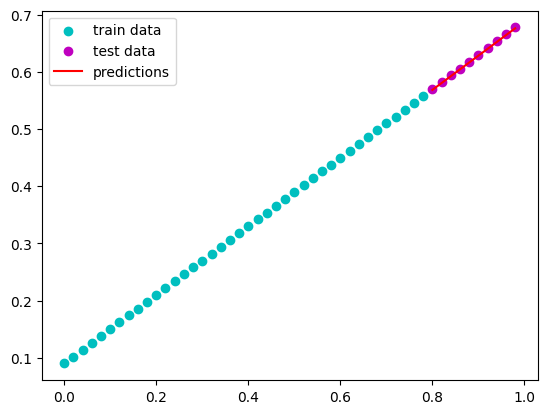

In [67]:
with torch.inference_mode():
    predictions = model_0(X_test)
    plot_predictions(X_train, y_train, X_test, y_test, predictions)


In [68]:
model_1 = LinearRegressionModel()
loss_fn= nn.L1Loss()
optimize=torch.optim.Adam(model_1.parameters(),lr=learning_rate)
trainer(epochs, learning_rate, model_1, loss_fn, optimize, X_train, y_train)

Epoch: 0 | Loss: 0.7758557200431824
Epoch: 5 | Loss: 0.7063558101654053
Epoch: 10 | Loss: 0.6368557810783386
Epoch: 15 | Loss: 0.5673558712005615
Epoch: 20 | Loss: 0.4978558421134949
Epoch: 25 | Loss: 0.428355872631073
Epoch: 30 | Loss: 0.36257368326187134
Epoch: 35 | Loss: 0.3048761785030365
Epoch: 40 | Loss: 0.2560117840766907
Epoch: 45 | Loss: 0.21644863486289978
Epoch: 50 | Loss: 0.18632963299751282
Epoch: 55 | Loss: 0.16480784118175507
Epoch: 60 | Loss: 0.15054014325141907
Epoch: 65 | Loss: 0.14174136519432068
Epoch: 70 | Loss: 0.13644616305828094
Epoch: 75 | Loss: 0.13249902427196503
Epoch: 80 | Loss: 0.1287665069103241
Epoch: 85 | Loss: 0.12446765601634979
Epoch: 90 | Loss: 0.11975453048944473
Epoch: 95 | Loss: 0.11473967134952545
Epoch: 100 | Loss: 0.10949331521987915
Epoch: 105 | Loss: 0.10435227304697037
Epoch: 110 | Loss: 0.0991407036781311
Epoch: 115 | Loss: 0.0939132571220398
Epoch: 120 | Loss: 0.08858174085617065
Epoch: 125 | Loss: 0.08310223370790482
Epoch: 130 | Loss: 0

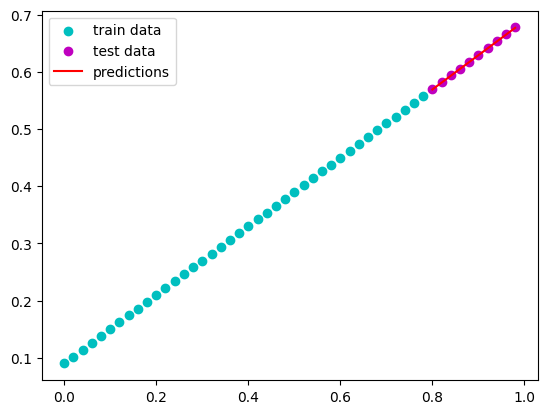

In [69]:
with torch.inference_mode():
    predictions = model_1(X_test)
    plot_predictions(X_train, y_train, X_test, y_test, predictions)